# Adapted from Homework 3 - Jacopo Sala - ATOC 5860. 
# Please NOTE:

- this code stops after creating the variable to save in mongodb from the file in input
- the variable is stored in an xarray which is hopefully similar to the one for RG, yet PRESSURE is not there as dimension
- dimensions are TIME, LATITUDE, LONGITUDE

In [1]:
import pandas as pd
import numpy as np
#import numpy.matlib 
#import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#import requests
#from calendar import monthrange
#import pickle as pkl
#import sys
#import statistics
import scipy.io
#import cartopy.crs as ccrs
#import numpy.linalg as LA
#import timeit
#import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html  
#from scipy import signal
import xarray as xr
#from matplotlib.gridspec import GridSpec


The data come from the Kuusela and Giglio OHC product. They include the vertical integral of conservative temperature in a pressure range that goes from 15dbar to 300dbar, and span from January 2005 to December 2020, for a total of 192 monthly timesteps.

They are available at ...

In [2]:
### Read in the data 
filepath=''
pressure_layer = '0015_0300' #changing this will allow to repeat for other pressure ranges (i.e. for other files)
filename='fullFieldSpaceTrendPchipPotTempGCOS_'+pressure_layer+'_5_20_10_tseries_global_Blanca.mat'
mat=scipy.io.loadmat(filepath+filename)
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'areaGrid_m2_used_to_Jules', 'area_m2_to_compute_Jm2', 'area_m2_used_to_Jules', 'cp0', 'd', 'd_GCOS_Jm2', 'd_GCOS_Jm2_using_area_m2_to_compute_Jm2', 'd_GCOS_ZJ', 'd_GCOS_deg', 'd_GCOS_temp_zint', 'dp', 'rho0', 't', 'tag'])


In [3]:
# Create latitude and logitude
lon = np.arange(start=20.5, stop=380.5, step=1)
lat = np.arange(start=-64.5, stop=65.5, step=1)
time = pd.date_range("2005-01-15", periods=192, freq = '1M')
print(lon.shape)
print(lat.shape)
print(time.shape)
d_GCOS_temp_zint = mat['d_GCOS_temp_zint']
# d_GCOS_temp_zint = d_GCOS_temp_zint[:,:,1]/areaGrid_m2_used_to_Jules
print(d_GCOS_temp_zint.shape)

(360,)
(130,)
(192,)
(360, 130, 192)


In [4]:
# Change position of axis - from lon, lat, time to time, lat, lon
d_GCOS_temp_zint = np.moveaxis(d_GCOS_temp_zint, 2, 0)
d_GCOS_temp_zint = np.moveaxis(d_GCOS_temp_zint, 2, 1)
print(d_GCOS_temp_zint.shape)

(192, 130, 360)


#### The commented lines below could be used to subset the global data to the North Pacific Ocean (-30-30 °N, 110-260°E) or any other region of interest

In [5]:
# d_GCOS_temp_zint = d_GCOS_temp_zint[:,:,(lon > 110) & (lon < 240)]
# lon = lon[(lon > 110) & (lon < 240)]
# d_GCOS_temp_zint = d_GCOS_temp_zint[:,(lat > -50) & (lat < 40),:]
# lat = lat[(lat > -50) & (lat < 40)]
# print(d_GCOS_temp_zint.shape)

In [6]:
# Convert data into a xarray Dataarray
bfr = xr.DataArray(
         data=d_GCOS_temp_zint,
        dims=["TIME", "LATITUDE", "LONGITUDE"],
        coords=dict(
            TIME=time,
            LATITUDE=(["LATITUDE"], lat),
            LONGITUDE=(["LONGITUDE"], lon),
        ),
    attrs=dict(
        description="Ocean heat content.",
        units="J/m2",
    ),
    )

exec('OHC_'+pressure_layer+'_Kuusela_Giglio = bfr')

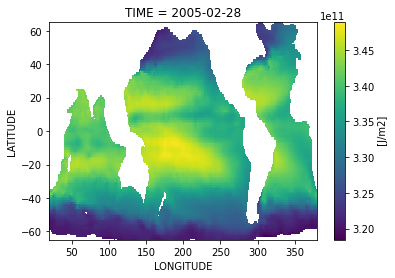

In [7]:
plot2dexample = bfr.isel(TIME=1)

plot2dexample.plot()

In [8]:
print('Variable to save to mongo: '+'OHC_'+pressure_layer+'_Kuusela_Giglio')

Variable to save to mongo: OHC_0015_0300_Kuusela_Giglio


In [9]:
bfr

<xarray.DataArray (TIME: 192, LATITUDE: 130, LONGITUDE: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * TIME       (TIME) datetime64[ns] 2005-01-31 2005-02-28 ... 2020-12-31
  * LATITUDE   (LATITUDE) float64 -64.5 -63.5 -62.5 -61.5 ... 62.5 63.5 64.5
  * LONGITUDE  (LONGITUDE) float64 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
Attributes:
    description:  Ocean heat content.
    units:        J/m2